In [74]:
from helpers import lasso_reg
%load_ext autoreload
%autoreload 2

from run import set_lambda, DATA_TRAIN_PATH, ret_classif_percentage, get_normalization_methods, \
    normalize_data, train
from proj1_helpers import load_csv_data
import numpy as np
import numpy as np
PLOT_PATH = '../plots/'

# Do not waste time to save the result
lambdas = (1e-22, 1e-21, 5e-21, 1e-20, 5e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15,
           1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-2, 1)

trs = []
tes= []
tes_reg= []


y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
norm_method = get_normalization_methods(tX)
tX = normalize_data(tX, norm_method)
init_weights = np.random.random_sample((tX.shape[1], 1))

for lmbd in lambdas:
    set_lambda(lmbd)
    _ = train(tX, y)
    tr, te = ret_classif_percentage()
    print(tr)
    trs.append(tr)
    tes.append(te)

    w, _ = lasso_reg(y.reshape((-1, 1)), tX, init_weights ,40, 0.01, 1e-20)

    removed_features = np.where(w == 0)
    tX_reg = np.delete(tX, removed_features, axis=1)

    _ = train(tX_reg, y)
    _, te = ret_classif_percentage()
    tes_reg.append(te)

trs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training set loss 0.3784656751992972; test set loss 10.48733425806746
Training set good classification 0.7771733333333334; test good classification 0.78048
Training set loss 0.2955857529402655; test set loss 4.550375096177845
Training set good classification 0.7991333333333334; test good classification 0.80232
Training set loss 0.32103230949045924; test set loss 2.5180896813654123
Training set good classification 0.8012622222222222; test good classification 0.80424
Training set loss 0.30298513905642677; test set loss 1.5987647303608505
Training set good classification 0.7947244444444445; test good classification 0.79936
Training set loss 0.28001229746175244; test set loss 0.37634807163810496
Training set good classification 0.81268; test good classification 0.81452
Training set loss 0.2914438700179183; test set loss 0.36365293945074945
Training set good classification 0.8011955555555555; test good c

[0.7771733333333334,
 0.8012622222222222,
 0.81268,
 0.8141911111111111,
 0.8132533333333334,
 0.8118533333333333,
 0.8118133333333334,
 0.8047066666666667,
 0.8078355555555555,
 0.8048,
 0.8013066666666666,
 0.7998666666666666,
 0.7985022222222222,
 0.7975244444444445,
 0.7963777777777777,
 0.7924977777777777,
 0.7848933333333333,
 0.7783511111111111,
 0.7716577777777778,
 0.7641733333333334,
 0.7488977777777778,
 0.7263511111111111,
 0.7037155555555555,
 0.7037155555555555,
 0.66844]

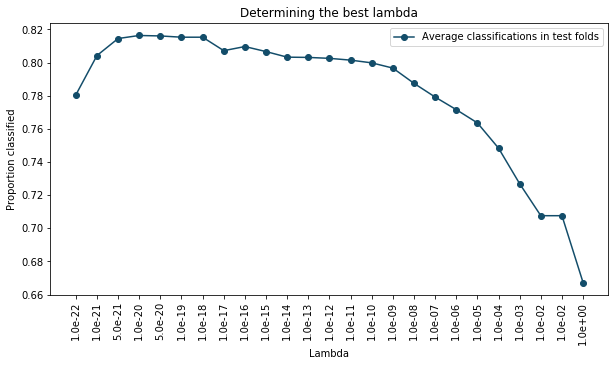

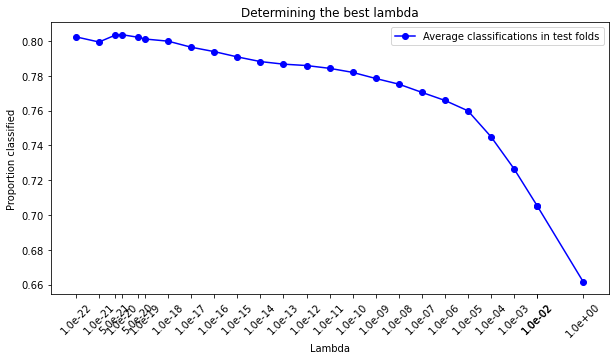

In [75]:
from matplotlib import pyplot as plt

def plot(x, y, labels):
    fig,ax = plt.subplots(figsize=(10,5))

    ax.plot(x, y, color='blue', label='Average classifications in test folds', marker='o')

    ax.set_xlabel('Lambda')
    ax.set_ylabel('Proportion classified')
    ax.set_xticks(x)
    ax.set_xticklabels(labels=labels, rotation=45)
    ax.legend(loc='upper right')

    fig.savefig('data/plots/'+"Determining the best lambda.pdf", bbox_inches='tight')

    plt.title('Determining the best lambda')
    plt.show()

labels = ['%.1e' % x for x in lambdas]
plot(np.log10(lambdas), tes, labels)
plot(np.log10(lambdas), tes_reg, labels)

In [76]:
print(np.max(tes))
print(np.max(tes_reg))

0.81636
0.80356


In [70]:
import pickle
# save data so teammate can make graph look consistent
with open('data/lambda.pkl', 'wb') as f:
    pickle.dump({"lambdas": lambdas, "te_precent": tes, "tr_percent": trs}, f)